In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
Url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
data = pd.read_csv(Url)


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
X = data.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'], axis =1 )
y = data['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [9]:
gender = {'male': 0,'female': 1}
X.Sex = [gender[item] for item in X.Sex]
    

In [10]:
#X.Sex.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


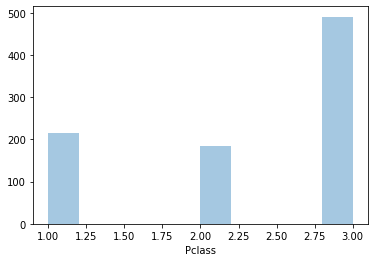

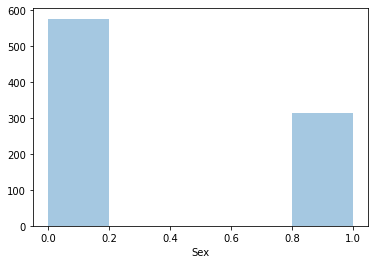

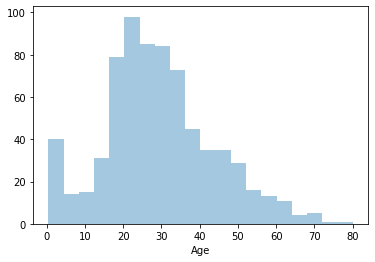

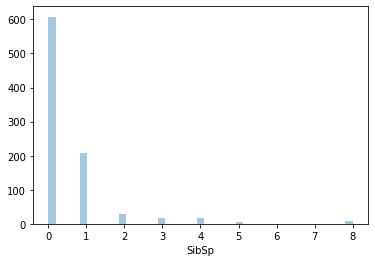

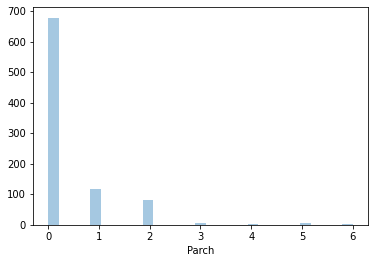

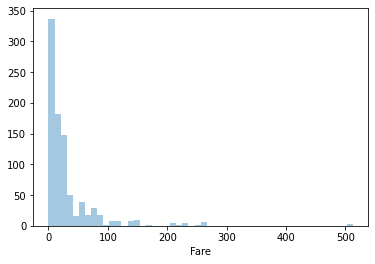

In [11]:
for col in  X.columns:
    sns.distplot(X[col], kde = False)
    plt.show()

In [12]:
X['Age'] = X['Age'].replace(float('nan'),round(X['Age'].mean(),2))

In [13]:
#Age is having the outliers and Fare is skewed

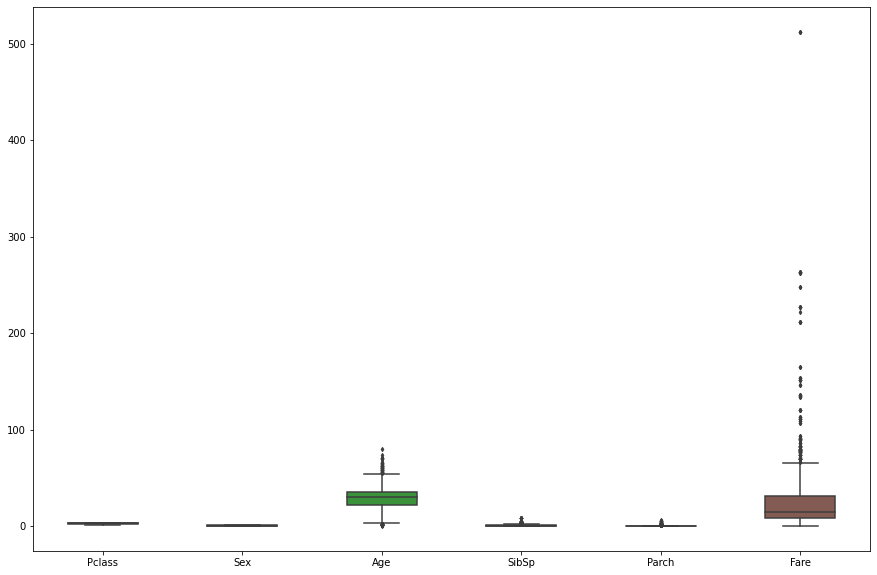

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

In [15]:
X.shape

(891, 6)

In [16]:
y.shape

(891,)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [32]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
clf.score(x_train,y_train)

0.985553772070626

In [34]:
clf.score(x_test,y_test)

0.7574626865671642

In [35]:
grid_param = {
    'criterion':['gini', 'emtropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random'],
    #'max_features':[2,3,4,5,6],
    #'min_weight_fraction_leaf':[0.0,0.5,1.0,1.5,2.0],
}

In [36]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 5,
                          n_jobs = -1)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'emtropy'],
                     

In [38]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 9, 'splitter': 'random'}


In [39]:
grid_search.best_score_

0.8250322580645161

In [40]:
clf1 = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 10,
                             min_samples_leaf = 5,
                             min_samples_split = 6,
                             splitter = 'random')
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [41]:
print(clf1.score(x_train,y_train))
print(clf1.score(x_test,y_test))

0.8250401284109149
0.7985074626865671


In [42]:
y_pred = clf1.predict(x_test)

In [43]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[151  20]
 [ 34  63]]


In [44]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [45]:
precision = true_positive/(true_positive+false_positive)
precision

0.8830409356725146

In [46]:
recall = true_positive/(true_positive+false_negative)
recall

0.8162162162162162

In [47]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.848314606741573

In [48]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7662627358774944

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

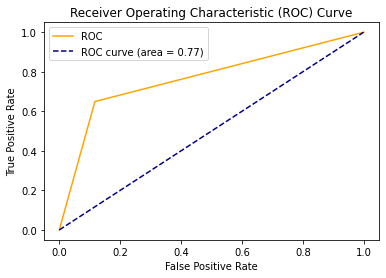

In [52]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [79]:
scalar = StandardScaler()

x_transform1 = scalar.fit_transform(X)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_transform1,y,test_size = 0.30, random_state= 355)

In [81]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
clf.score(x_train,y_train)

0.985553772070626

In [83]:
clf.score(x_test,y_test)

0.7350746268656716

In [84]:
grid_param = {
    'criterion':['gini', 'emtropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random'],
    #'max_features':[2,3,4,5,6],
    #'min_weight_fraction_leaf':[0.0,0.5,1.0,1.5,2.0],
}

In [85]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 5,
                          n_jobs = -1)

In [86]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'emtropy'],
                     

In [87]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}


In [88]:
grid_search.best_score_

0.8233935483870969

In [89]:
clf2 = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 11,
                             min_samples_leaf = 2,
                             min_samples_split = 5,
                             splitter = 'random')
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [90]:
print(clf2.score(x_train,y_train))
print(clf2.score(x_test,y_test))

0.8731942215088283
0.7835820895522388


In [91]:
y_pred = clf2.predict(x_test)

In [92]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [93]:
precision = true_positive/(true_positive+false_positive)
precision

0.8830409356725146

In [94]:
recall = true_positive/(true_positive+false_negative)
recall

0.8162162162162162

In [95]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.848314606741573

In [96]:
auc = roc_auc_score(y_test, y_pred)
auc

0.765720142280099

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

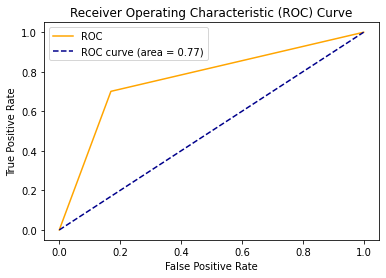

In [98]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

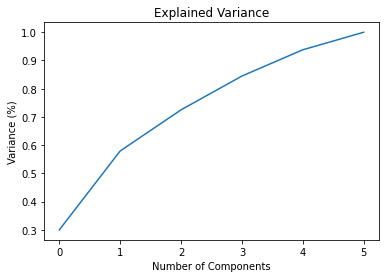

In [99]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [100]:
pca = PCA(n_components=5)
new_data1 = pca.fit_transform(x_transform1)

principal_x1 = pd.DataFrame(new_data1,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [101]:
x_train,x_test,y_train,y_test = train_test_split(principal_x1,y,test_size = 0.30, random_state= 355)

In [102]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
clf.score(x_train,y_train)

0.985553772070626

In [104]:
clf.score(x_test,y_test)

0.7089552238805971

In [105]:
grid_param = {
    'criterion':['gini', 'emtropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random'],
    #'max_features':[2,3,4,5,6],
    #'min_weight_fraction_leaf':[0.0,0.5,1.0,1.5,2.0],
}

In [106]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv=5,
                    n_jobs =-1)

In [107]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'emtropy'],
                     

In [108]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 7, 'min_samples_split': 5, 'splitter': 'random'}


In [109]:
grid_search.best_score_

0.8089548387096773

In [110]:
clf3 = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 28,
                             min_samples_leaf = 6,
                             min_samples_split = 5,
                             splitter = 'random')
clf3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [111]:
print(clf3.score(x_train,y_train))
print(clf3.score(x_test,y_test))

0.8282504012841091
0.7574626865671642


In [112]:
y_predd = clf3.predict(x_test)

In [113]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[142,  29],
       [ 29,  68]])

In [114]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [115]:
precision = true_positive/(true_positive + false_positive)
precision

0.8304093567251462

In [116]:
recall = true_positive/(true_positive + false_negative)
recall

0.8304093567251462

In [117]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.8304093567251462

In [118]:
auc = roc_auc_score(y_test, y_pred)
auc

0.765720142280099

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

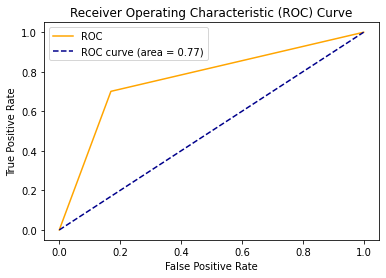

In [120]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()